# Clasificador de Imágenes para la detección de Pneumonia 

### Importar Librerías

In [6]:
from PIL import Image
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img
from tensorflow.keras import optimizers,layers
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from IPython.display import Image
import itertools
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD

### Clasificación 1: Pneumonia vs Normal


### Preparación

In [7]:
# Directorios de entrenamiento, validación y prueba
train_dir = 'archive/chest_xray/train'
val_dir = 'archive/chest_xray/val'
test_dir = 'archive/chest_xray/test'

# Altura y anchura de la imagen
img_width, img_height = 256, 256
# Tamaño de lote
batch_size = 64
# Epocas
epochs = 1000

# Preprocesar los datos de imagen utilizando ImageDataGenerator

test_datagen = ImageDataGenerator()

train_generator_1 = tf.keras.preprocessing.image_dataset_from_directory(train_dir, 
                                                      image_size=(img_width, img_height),
                                                      batch_size=batch_size,
                                                      color_mode="grayscale",
                                                      seed=1234, 
                                                      label_mode='categorical',)

val_generator_1 = tf.keras.preprocessing.image_dataset_from_directory(val_dir, 
                                                    image_size=(img_width, img_height),
                                                    batch_size=batch_size, 
                                                    color_mode="grayscale",
                                                    seed=1234,
                                                    label_mode='categorical')

test_generator_1 = test_datagen.flow_from_directory(test_dir, 
                                                     color_mode="grayscale",
                                                    seed=1234,
                                                    target_size=(img_height, img_width),
                                                    class_mode="categorical", batch_size=32,
                                                    shuffle=False)


Found 7573 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [8]:
class StopTrainingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('loss') < 0.2:
            print('\nSe ha alcanzado el valor de pérdida deseado.')
            self.model.stop_training = True


#### Entrenamiento

In [9]:
model = Sequential()
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 1))
model.add(normalization_layer)
# capa de convolución 1
model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid', input_shape=(200,200,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# capa de convolución 2
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# capa de convolución 3
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# capa de convolución 4
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# capa de convolución 5
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# capa completamente conectada 1
model.add(Flatten())
model.add(Dense(4096, input_shape=(200*200,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))

# capa completamente conectada 2
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.4))

# capa de salida
model.add(Dense(2))
model.add(Activation('softmax'))

# compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer= SGD (learning_rate = 0.01), metrics=['accuracy'])

stop_training_callback = StopTrainingCallback()
history = model.fit(
        train_generator_1,
        epochs = epochs,
        validation_data = test_generator_1,
        callbacks = [stop_training_callback],
)

Epoch 1/1000
119/119 [==============================] - 150s 1s/step - loss: 0.6900 - accuracy: 0.5921 - val_loss: 0.6890 - val_accuracy: 0.5801
Epoch 2/1000
119/119 [==============================] - 157s 1s/step - loss: 0.6786 - accuracy: 0.6676 - val_loss: 0.6762 - val_accuracy: 0.5737
Epoch 3/1000
119/119 [==============================] - 159s 1s/step - loss: 0.6525 - accuracy: 0.6552 - val_loss: 0.7277 - val_accuracy: 0.3766
Epoch 4/1000
119/119 [==============================] - 162s 1s/step - loss: 0.5705 - accuracy: 0.7232 - val_loss: 0.5842 - val_accuracy: 0.6378
Epoch 5/1000
119/119 [==============================] - 153s 1s/step - loss: 0.4152 - accuracy: 0.8277 - val_loss: 0.6730 - val_accuracy: 0.6554
Epoch 6/1000
119/119 [==============================] - 155s 1s/step - loss: 0.2513 - accuracy: 0.8986 - val_loss: 0.5514 - val_accuracy: 0.7644
Epoch 7/1000
119/119 [==============================] - ETA: 0s - loss: 0.1749 - accuracy: 0.9336
Se ha alcanzado el valor de pérd

In [10]:
import winsound

# Reproduce un pitido durante 1 segundo a 440 Hz
duration = 1000  # duración en milisegundos
freq = 440  # frecuencia en Hz
winsound.Beep(freq, duration)


#### Arquitectura de la red dibujada

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
1/1 [==============================] - 0s 111ms/step - loss: 0.4012 - accuracy: 0.8750
Test accuracy: 0.875
Test loss: 0.40118294954299927


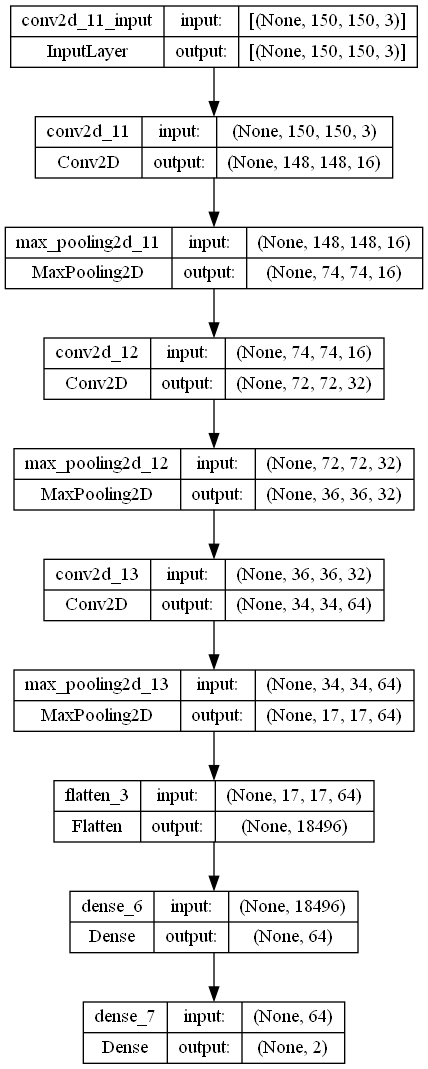

In [11]:
# Guarda la imagen del modelo
plot_model(model, to_file = 'modeloCalificación1.png', show_shapes=True)

# Evaluar el modelo con los datos de prueba
test_loss, test_acc = model.evaluate(val_generator_1)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# Muestra la imagen del modelo
Image(filename = 'modeloCalificación1.png')

#### Gráfica de Variación del error según los epochs

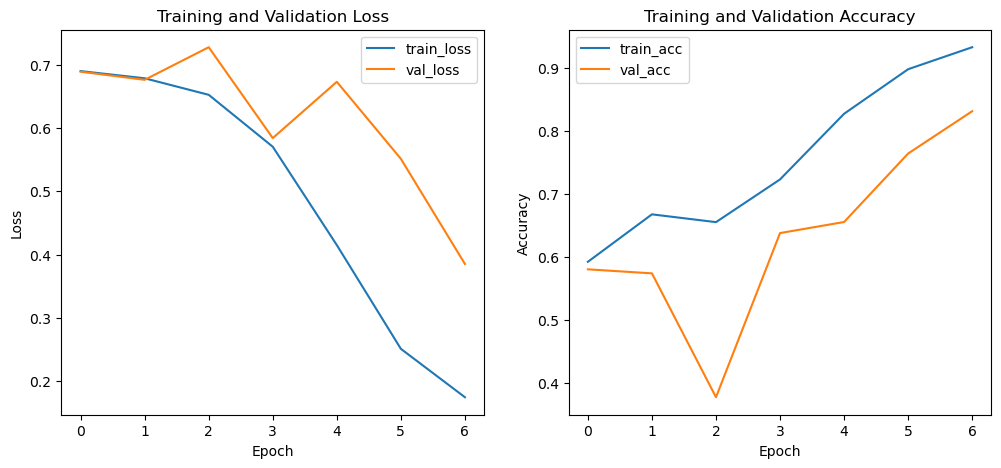

20/20 [==============================] - 5s 239ms/step


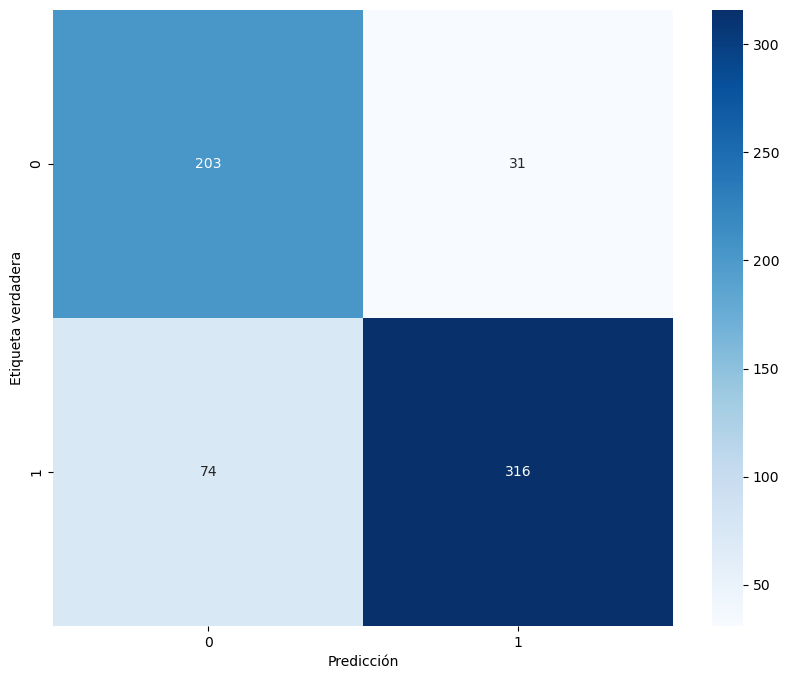

In [12]:
# Obtener los valores de loss y accuracy del entrenamiento y validación
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

# Crear una figura con dos subplots para mostrar loss y accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de loss
ax1.plot(train_loss, label='train_loss')
ax1.plot(val_loss, label='val_loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Gráfico de accuracy
ax2.plot(train_acc, label = 'train_acc')
ax2.plot(val_acc, label = 'val_acc')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

# Obtener predicciones para el conjunto de prueba
y_pred = model.predict(test_generator_1)
# Convertir las probabilidades en etiquetas de clase
y_pred = np.argmax(y_pred, axis=1)
# Obtener las etiquetas verdaderas del conjunto de prueba
y_true = test_generator_1.classes

# Crear matriz de confusión
confusion_mtx = confusion_matrix(y_true, y_pred)

# Mostrar la matriz de confusión
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta verdadera')
plt.show()

#### Evaluación y predicción

1/1 [==============================] - ETA: 0s

c:\Users\kinde\anaconda3\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(
c:\Users\kinde\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


1/1 [==============================] - 0s 35ms/step


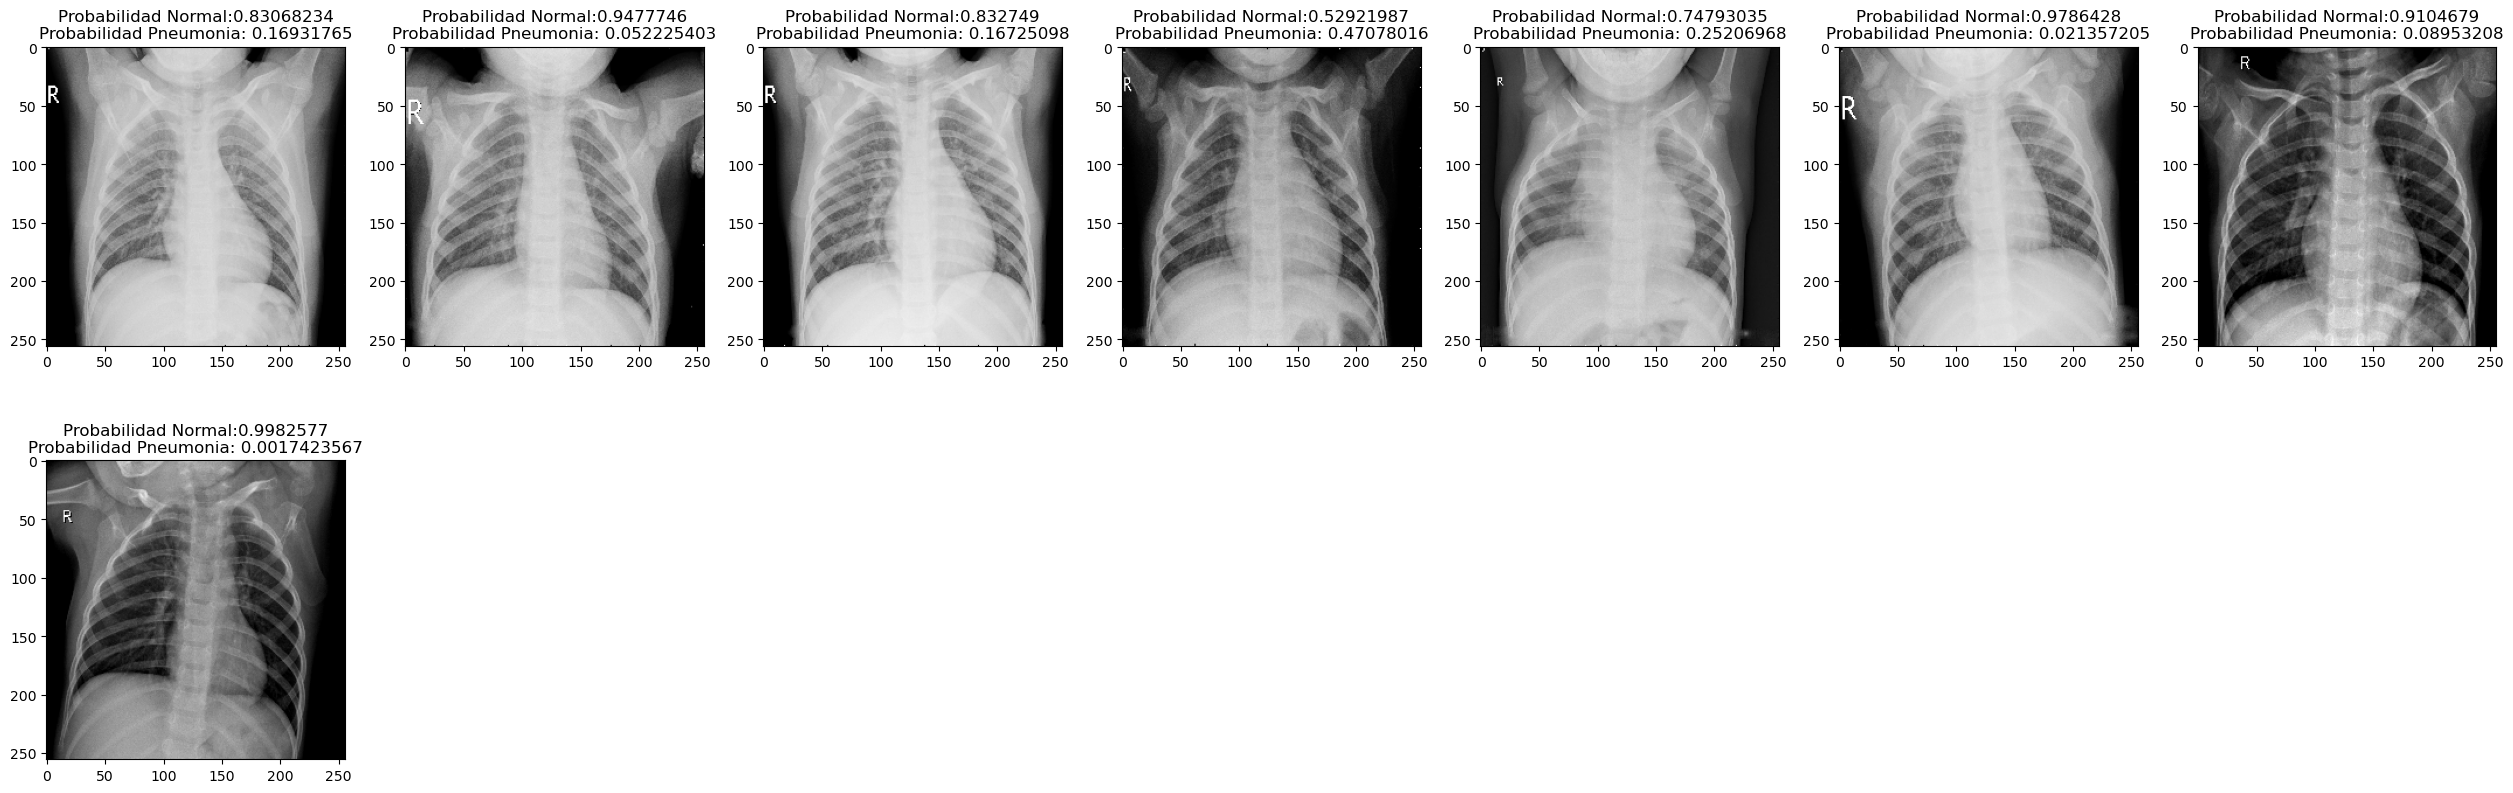

In [13]:
current_dir = os.getcwd()
i = 0
probs = []
plt.figure(figsize=(25, 8))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for file in os.listdir( current_dir + '/archive/chest_xray/val/NORMAL/'):
    plt.subplot(2, 7, i + 1)
    i = i+1
    img = load_img(current_dir + '/archive/chest_xray/val/NORMAL/' + file, target_size = (img_width, img_height), grayscale=True)  
    x = img_to_array(img)  
    img_batch = np.expand_dims(x, axis=0)
    prediction = model.predict(img_batch)
    plt.title(prediction)
    plt.title( 'Probabilidad Normal:' + str(prediction[0][0]) + '\nProbabilidad Pneumonia: ' + str(prediction[0][1])) 
    plt.imshow(img, cmap='gray')

1/1 [==============================] - 0s 36ms/step


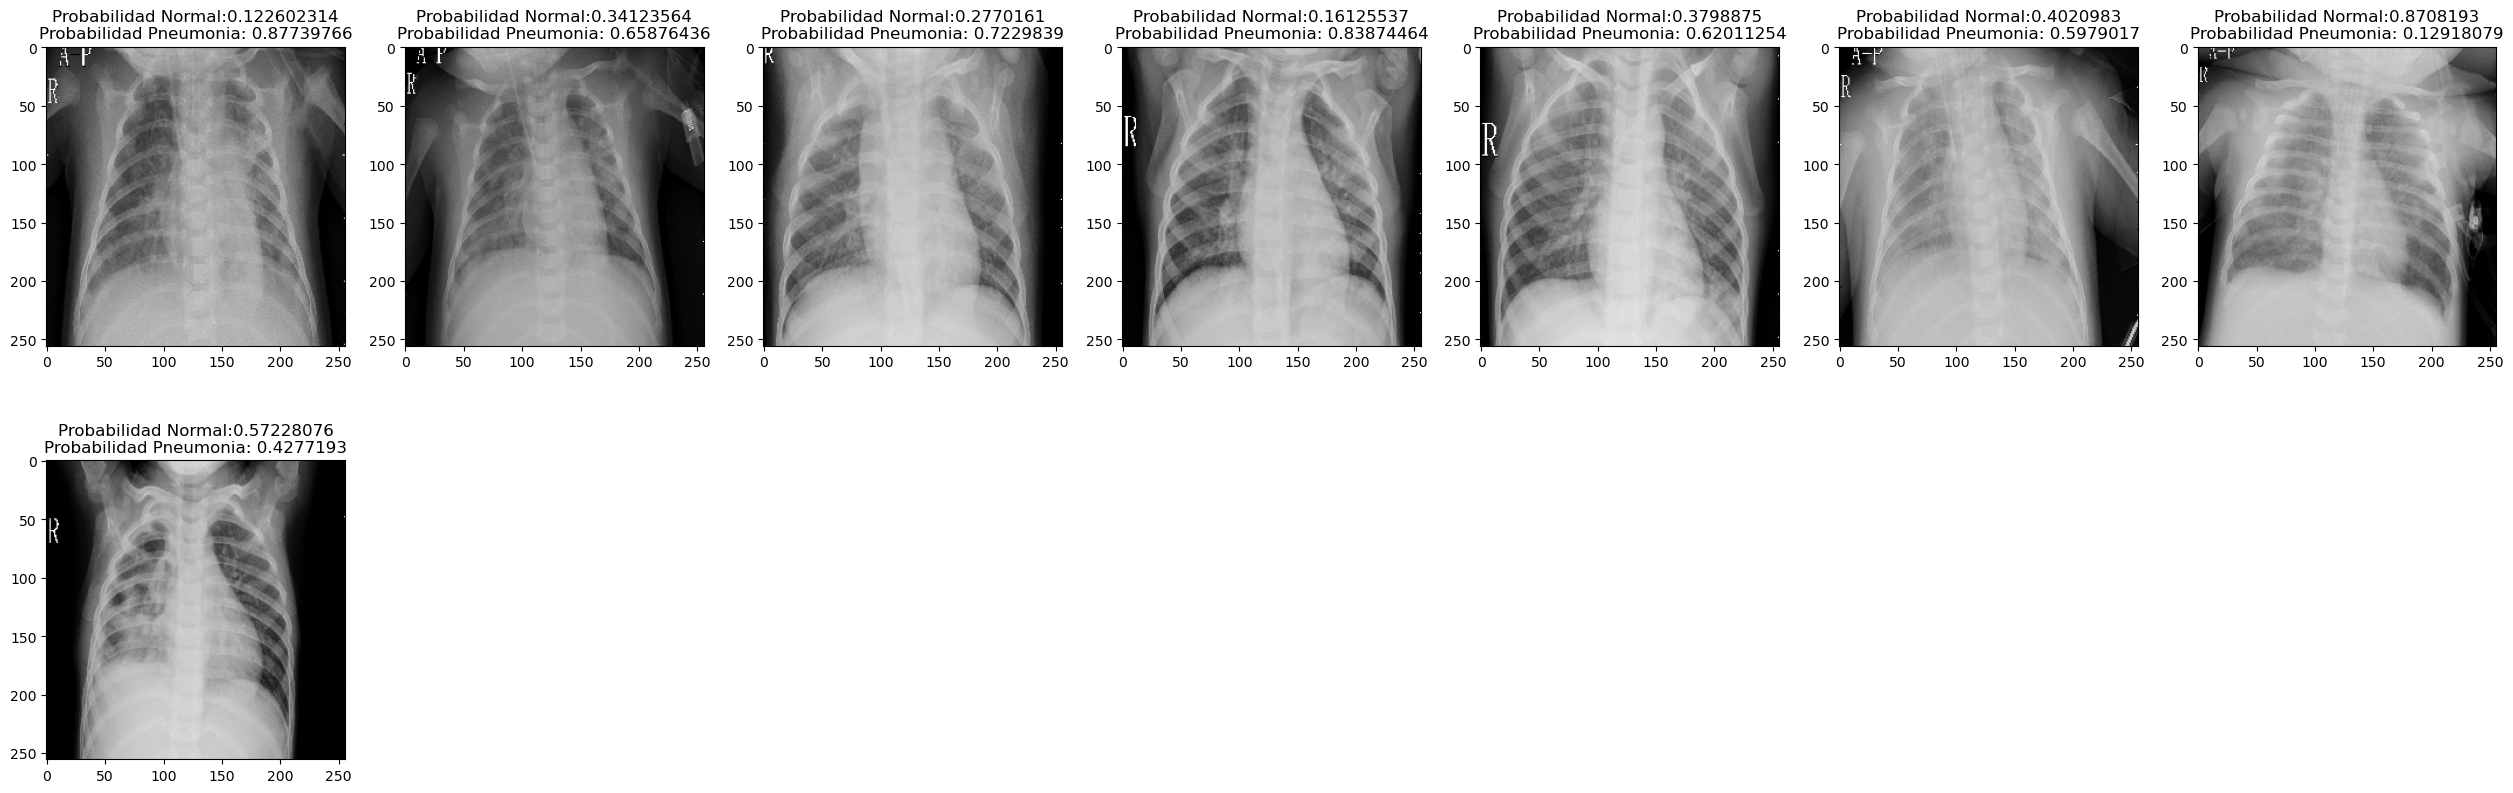

In [14]:
current_dir = os.getcwd()
i = 0
probs = []
plt.figure(figsize=(25, 8))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for file in os.listdir( current_dir + '/archive/chest_xray/val/PNEUMONIA/'):
    plt.subplot(2, 7, i + 1)
    i = i+1
    img = load_img(current_dir + '/archive/chest_xray/val/PNEUMONIA/' + file, target_size = (img_width, img_height), grayscale=True)  
    x = img_to_array(img)  
    img_batch = np.expand_dims(x, axis=0)
    prediction = model.predict(img_batch)
    plt.title(prediction)
    plt.title( 'Probabilidad Normal:' + str(prediction[0][0]) + '\nProbabilidad Pneumonia: ' + str(prediction[0][1])) 
    plt.imshow(img, cmap='gray')

### Clasificación 2: Pneumonia bacteriana vs Pneumonía vírica vs Normal

#### Importar librerías

In [27]:
from PIL import Image
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import tensorflow.keras.utils as utils


In [16]:
# Especificar la ruta principal donde se crearán los directorios
ruta_principal = 'archive/chest_xray/chest_xray/train/'

# Crear el directorio "bacteria" en la ruta principal si no existe
ruta_bacteria = os.path.join(ruta_principal, 'PNEUMONIA_Bacteriana')
if not os.path.exists(ruta_bacteria):
    os.makedirs(ruta_bacteria)

# Crear el directorio "virus" en la ruta principal si no existe
ruta_virus = os.path.join(ruta_principal, 'PNEUMONIA_Virica')
if not os.path.exists(ruta_virus):
    os.makedirs(ruta_virus)

# Definir el directorio de la carpeta PNEUMONIA
pneumonia_dir = 'archive/chest_xray/chest_xray/train/PNEUMONIA/'

# Definir el directorio de la carpeta para las imágenes de bacteria
bacteria_dir = 'archive/chest_xray/chest_xray/train/PNEUMONIA_Bacteriana'

# Definir el directorio de la carpeta para las imágenes de virus
virus_dir = 'archive/chest_xray/chest_xray/train/PNEUMONIA_Virica'

# Iterar a través de los archivos en la carpeta PNEUMONIA
if os.path.exists('archive/chest_xray/chest_xray/train/PNEUMONIA'):
    shutil.rmtree('archive/chest_xray/chest_xray/train/PNEUMONIA')
    for filename in os.listdir(pneumonia_dir):
        # Si el nombre de archivo contiene la palabra "bacteria", copiar a la carpeta de bacteria
        if 'bacteria' in filename:
            shutil.copy(pneumonia_dir + filename, bacteria_dir)
        # Si el nombre de archivo contiene la palabra "virus", copiar a la carpeta de virus
        elif 'virus' in filename:
            shutil.copy(pneumonia_dir + filename, virus_dir)
    shutil.rmtree('archive/chest_xray/chest_xray/train/PNEUMONIA')



In [17]:
# Especificar la ruta principal donde se crearán los directorios
ruta_principal = 'archive/chest_xray/chest_xray/test/'

# Crear el directorio "bacteria" en la ruta principal si no existe
ruta_bacteria = os.path.join(ruta_principal, 'PNEUMONIA_Bacteriana')
if not os.path.exists(ruta_bacteria):
    os.makedirs(ruta_bacteria)

# Crear el directorio "virus" en la ruta principal si no existe
ruta_virus = os.path.join(ruta_principal, 'PNEUMONIA_Virica')
if not os.path.exists(ruta_virus):
    os.makedirs(ruta_virus)

# Definir el directorio de la carpeta PNEUMONIA
pneumonia_dir = 'archive/chest_xray/chest_xray/test/PNEUMONIA/'

# Definir el directorio de la carpeta para las imágenes de bacteria
bacteria_dir = 'archive/chest_xray/chest_xray/test/PNEUMONIA_Bacteriana'

# Definir el directorio de la carpeta para las imágenes de virus
virus_dir = 'archive/chest_xray/chest_xray/test/PNEUMONIA_Virica'

# Iterar a través de los archivos en la carpeta PNEUMONIA
if os.path.exists('archive/chest_xray/chest_xray/test/PNEUMONIA'):
    for filename in os.listdir(pneumonia_dir):
        # Si el nombre de archivo contiene la palabra "bacteria", copiar a la carpeta de bacteria
        if 'bacteria' in filename:
            shutil.copy(pneumonia_dir + filename, bacteria_dir)
        # Si el nombre de archivo contiene la palabra "virus", copiar a la carpeta de virus
        elif 'virus' in filename:
            shutil.copy(pneumonia_dir + filename, virus_dir)
    shutil.rmtree('archive/chest_xray/chest_xray/test/PNEUMONIA')

In [18]:
# Especificar la ruta principal donde se crearán los directorios
ruta_principal = 'archive/chest_xray/chest_xray/val/'

# Crear el directorio "bacteria" en la ruta principal si no existe
ruta_bacteria = os.path.join(ruta_principal, 'PNEUMONIA_Bacteriana')
if not os.path.exists(ruta_bacteria):
    os.makedirs(ruta_bacteria)

# Crear el directorio "virus" en la ruta principal si no existe
ruta_virus = os.path.join(ruta_principal, 'PNEUMONIA_Virica')
if not os.path.exists(ruta_virus):
    os.makedirs(ruta_virus)

# Definir el directorio de la carpeta PNEUMONIA
pneumonia_dir = 'archive/chest_xray/chest_xray/val/PNEUMONIA/'

# Definir el directorio de la carpeta para las imágenes de bacteria
bacteria_dir = 'archive/chest_xray/chest_xray/val/PNEUMONIA_Bacteriana'

# Definir el directorio de la carpeta para las imágenes de virus
virus_dir = 'archive/chest_xray/chest_xray/val/PNEUMONIA_Virica'

# Iterar a través de los archivos en la carpeta PNEUMONIA
if os.path.exists('archive/chest_xray/chest_xray/val/PNEUMONIA'):
    for filename in os.listdir(pneumonia_dir):
        # Si el nombre de archivo contiene la palabra "bacteria", copiar a la carpeta de bacteria
        if 'bacteria' in filename:
            shutil.copy(pneumonia_dir + filename, bacteria_dir)
        # Si el nombre de archivo contiene la palabra "virus", copiar a la carpeta de virus
        elif 'virus' in filename:
            shutil.copy(pneumonia_dir + filename, virus_dir)
    shutil.rmtree('archive/chest_xray/chest_xray/val/PNEUMONIA')

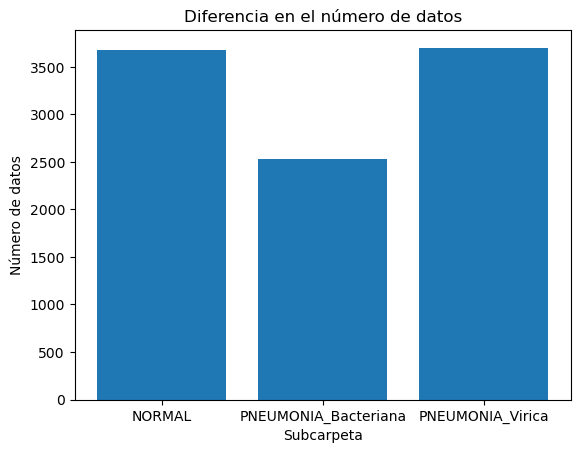

In [19]:
# Ruta de la carpeta con los datos
ruta_datos = "archive/chest_xray/chest_xray/train/"

# Crear una lista con los nombres de todas las subcarpetas en la carpeta con los datos
subcarpetas = [nombre for nombre in os.listdir(ruta_datos) if os.path.isdir(os.path.join(ruta_datos, nombre))]

# Crear un diccionario con la información del número de datos en cada subcarpeta
datos = {}
for subcarpeta in subcarpetas:
    ruta_subcarpeta = os.path.join(ruta_datos, subcarpeta)
    numero_datos = len(os.listdir(ruta_subcarpeta))
    datos[subcarpeta] = numero_datos

# Crear un dataframe con la información del número de datos en cada subcarpeta
df = pd.DataFrame.from_dict(datos, orient='index', columns=['Número de datos'])

# Crear un gráfico de barras para visualizar la diferencia en el número de datos
plt.bar(df.index, df['Número de datos'])
plt.title('Diferencia en el número de datos')
plt.xlabel('Subcarpeta')
plt.ylabel('Número de datos')
plt.show()

### Preprocesamiento para esta clasificacion

In [20]:
# Directorios de entrenamiento, validación y prueba
train_dir = 'archive/chest_xray/chest_xray/train/'
val_dir = 'archive/chest_xray/chest_xray/val/'
test_dir = 'archive/chest_xray/chest_xray/test/'

# Altura y anchura de la imagen
img_width, img_height = 256, 256
# Tamaño de lote
batch_size = 64
# Epocas
epochs = 1000

# Preprocesar los datos de imagen utilizando ImageDataGenerator

test_datagen = ImageDataGenerator()

train_generator_1 = tf.keras.preprocessing.image_dataset_from_directory(train_dir, 
                                                      image_size=(img_width, img_height),
                                                      batch_size=batch_size,
                                                      color_mode="grayscale",
                                                      seed=1234, 
                                                      label_mode='categorical',)

val_generator_1 = tf.keras.preprocessing.image_dataset_from_directory(val_dir, 
                                                    image_size=(img_width, img_height),
                                                    batch_size=batch_size, 
                                                    color_mode="grayscale",
                                                    seed=1234,
                                                    label_mode='categorical')

test_generator_1 = test_datagen.flow_from_directory(test_dir, 
                                                     color_mode="grayscale",
                                                    seed=1234,
                                                    target_size=(img_height, img_width),
                                                    class_mode="categorical", batch_size=32,
                                                    shuffle=False)

Found 9911 files belonging to 3 classes.
Found 16 files belonging to 3 classes.
Found 624 images belonging to 3 classes.


In [21]:
model = Sequential()

# Capa de entrada y normalización
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 1))
model.add(normalization_layer)

# Capa de convolución 1
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Capa de convolución 2
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Capa de convolución 3
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Capa completamente conectada 1
model.add(Flatten())
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Capa de salida
model.add(Dense(3))
model.add(Activation('softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

stop_training_callback = StopTrainingCallback()
history = model.fit(
        train_generator_1,
        epochs = epochs,
        validation_data = test_generator_1,
        callbacks = [stop_training_callback],
)

Epoch 1/1000
155/155 [==============================] - 159s 1s/step - loss: 0.6929 - accuracy: 0.7215 - val_loss: 2.2198 - val_accuracy: 0.2372
Epoch 2/1000
155/155 [==============================] - 159s 1s/step - loss: 0.4831 - accuracy: 0.8059 - val_loss: 2.0427 - val_accuracy: 0.2372
Epoch 3/1000
155/155 [==============================] - 157s 1s/step - loss: 0.4234 - accuracy: 0.8287 - val_loss: 0.9541 - val_accuracy: 0.5385
Epoch 4/1000
155/155 [==============================] - 153s 982ms/step - loss: 0.3860 - accuracy: 0.8473 - val_loss: 0.6787 - val_accuracy: 0.7804
Epoch 5/1000
155/155 [==============================] - 155s 996ms/step - loss: 0.3640 - accuracy: 0.8502 - val_loss: 0.6579 - val_accuracy: 0.7997
Epoch 6/1000
155/155 [==============================] - 155s 995ms/step - loss: 0.3392 - accuracy: 0.8627 - val_loss: 0.9852 - val_accuracy: 0.6667
Epoch 7/1000
155/155 [==============================] - 156s 1s/step - loss: 0.3189 - accuracy: 0.8726 - val_loss: 0.8758

In [29]:
# Guarda la imagen del modelo
plot_model(model, to_file = 'modeloCalificación2.png', show_shapes=True)

# Evaluar el modelo con los datos de prueba
test_loss, test_acc = model.evaluate(val_generator_1)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# Muestra la imagen del modelo
Image(filename = 'modeloCalificación2.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
1/1 [==============================] - 0s 77ms/step - loss: 0.6378 - accuracy: 0.7500
Test accuracy: 0.75
Test loss: 0.6377647519111633


TypeError: 'module' object is not callable

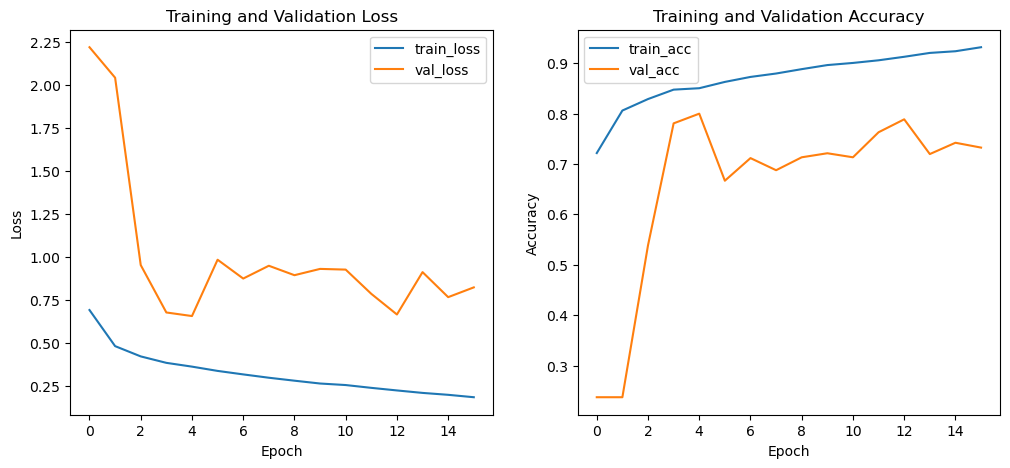

20/20 [==============================] - 4s 187ms/step


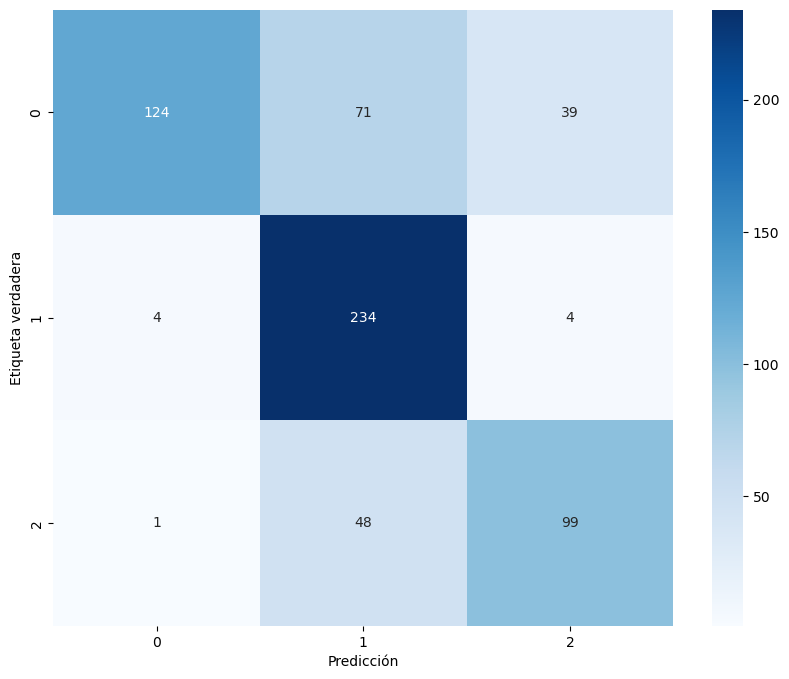

In [31]:
# Obtener los valores de loss y accuracy del entrenamiento y validación
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

# Crear una figura con dos subplots para mostrar loss y accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de loss
ax1.plot(train_loss, label='train_loss')
ax1.plot(val_loss, label='val_loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Gráfico de accuracy
ax2.plot(train_acc, label = 'train_acc')
ax2.plot(val_acc, label = 'val_acc')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

# Obtener predicciones para el conjunto de prueba
y_pred = model.predict(test_generator_1)
# Convertir las probabilidades en etiquetas de clase
y_pred = np.argmax(y_pred, axis=1)
# Obtener las etiquetas verdaderas del conjunto de prueba
y_true = test_generator_1.classes

# Crear matriz de confusión
confusion_mtx = confusion_matrix(y_true, y_pred)

# Mostrar la matriz de confusión
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta verdadera')
plt.show()

#### Evaluación y predicción

1/1 [==============================] - 0s 18ms/step


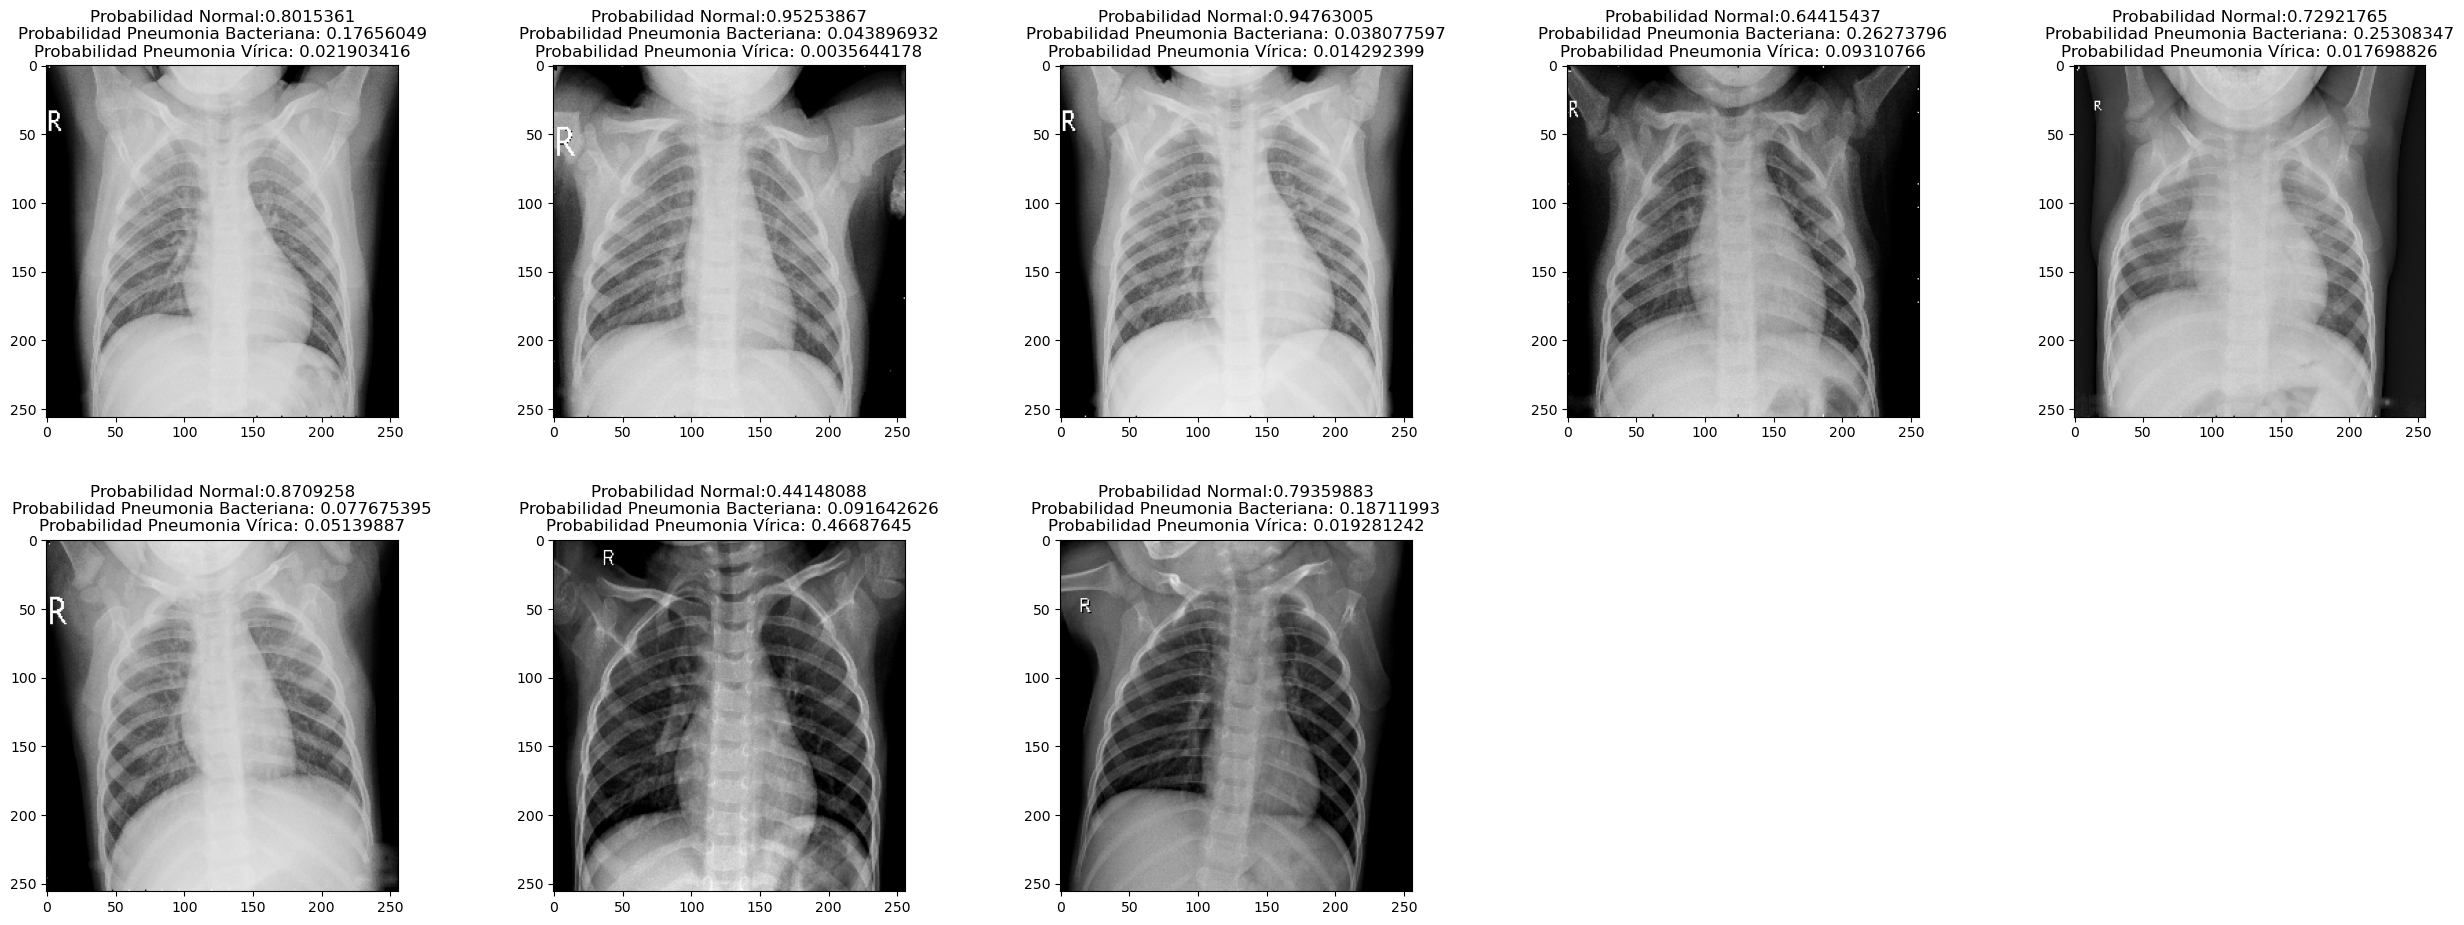

In [34]:
current_dir = os.getcwd()
i = 0
probs = []
plt.figure(figsize=(25, 25))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for file in os.listdir( current_dir + '/archive/chest_xray/chest_xray/val/NORMAL/'):
    plt.subplot(5, 5, i + 1)
    i = i+1
    img = load_img(current_dir + '/archive/chest_xray/val/NORMAL/' + file, target_size = (img_width, img_height), grayscale=True)  
    x = img_to_array(img)  
    img_batch = np.expand_dims(x, axis=0)
    prediction = model.predict(img_batch)
    plt.title('Probabilidad Normal:' + str(prediction[0][0]) + '\nProbabilidad Pneumonia Bacteriana: ' + str(prediction[0][1]) + '\nProbabilidad Pneumonia Vírica: ' + str(prediction[0][2])) 
    plt.imshow(img, cmap='gray')

1/1 [==============================] - 0s 20ms/step


c:\Users\kinde\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


1/1 [==============================] - 0s 20ms/step


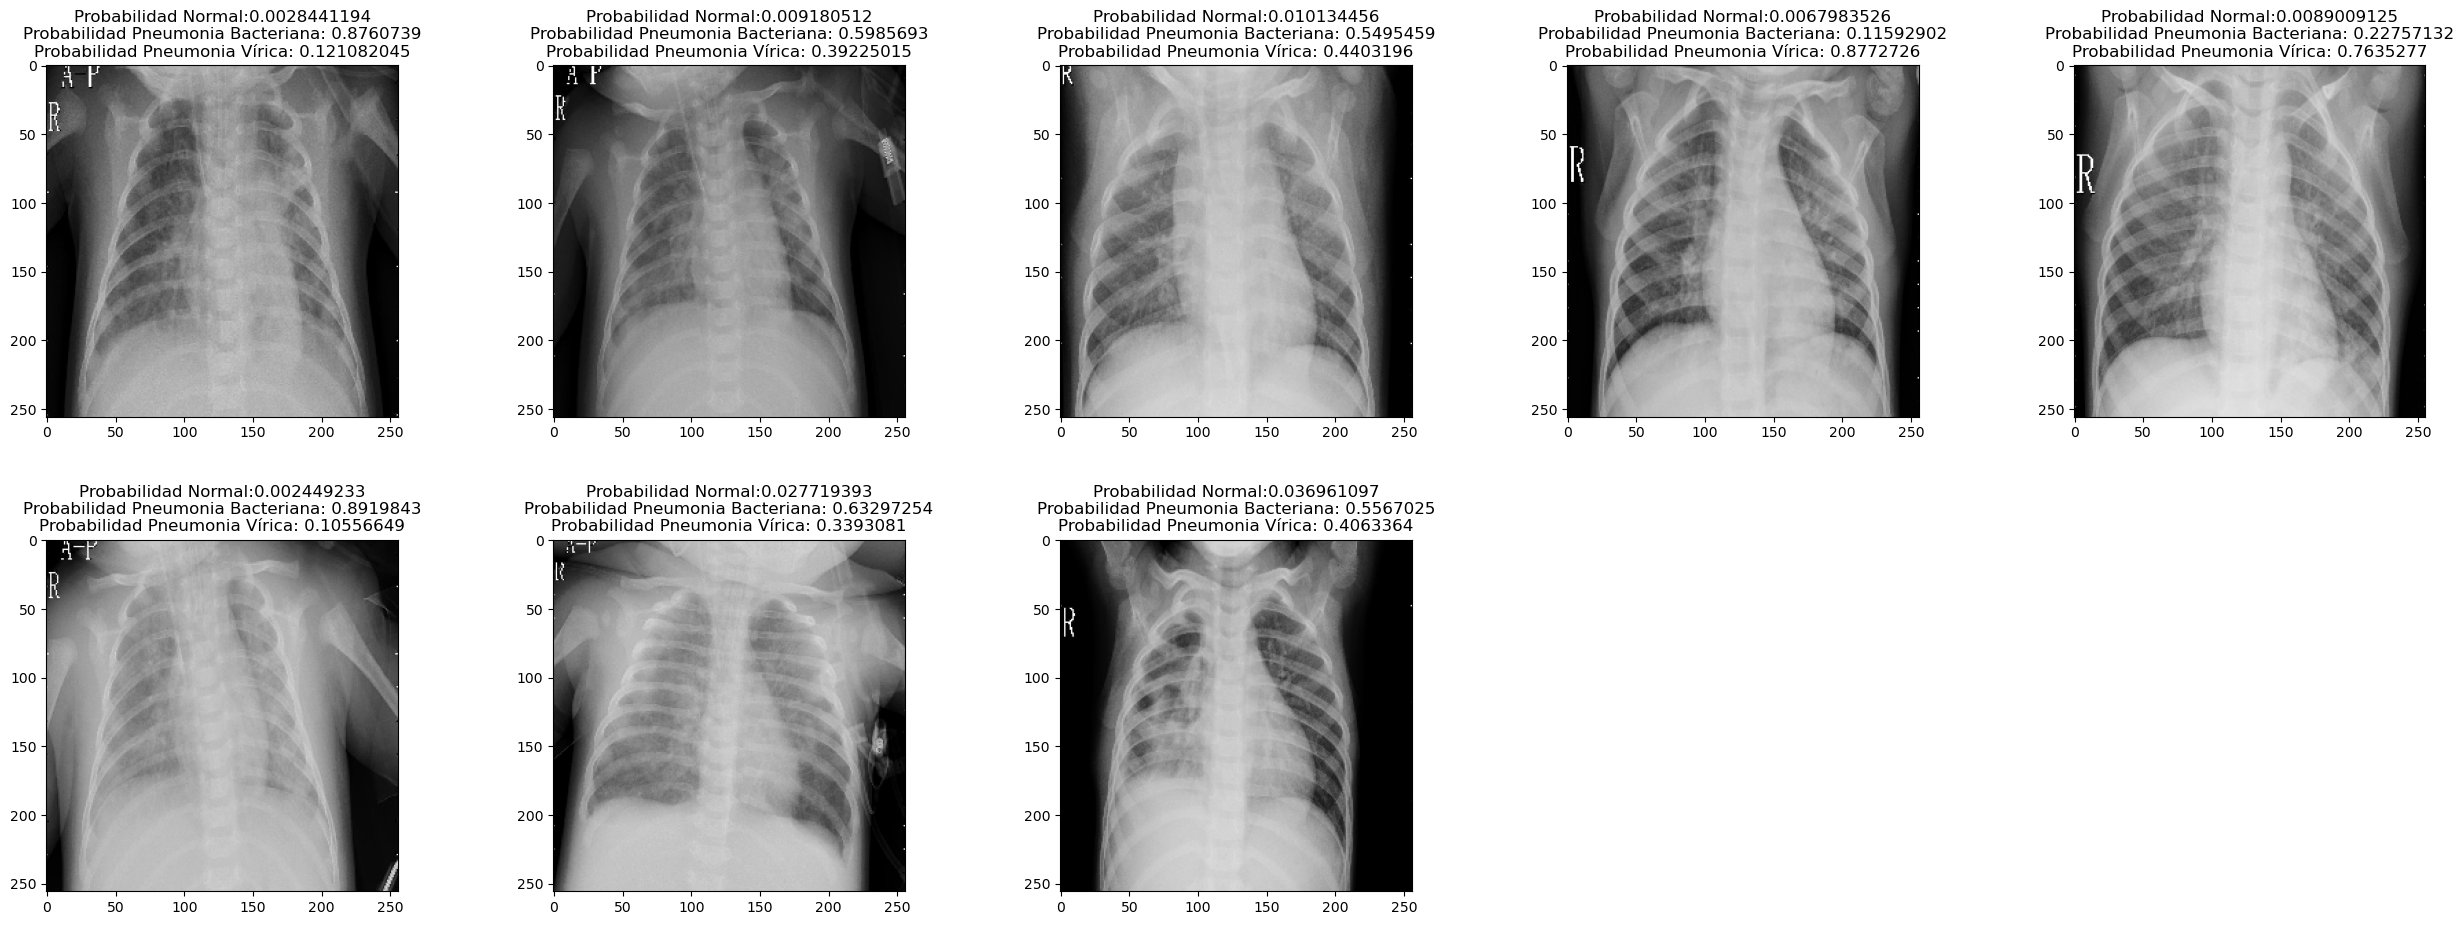

In [35]:
current_dir = os.getcwd()
i = 0
probs = []
plt.figure(figsize=(25, 25))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for file in os.listdir( current_dir + '/archive/chest_xray/chest_xray/val/PNEUMONIA_Bacteriana/'):
    plt.subplot(5, 5, i + 1)
    i = i+1
    img = load_img(current_dir + '/archive/chest_xray/chest_xray/val/PNEUMONIA_Bacteriana/' + file, target_size = (img_width, img_height), grayscale=True)  
    x = img_to_array(img)  
    img_batch = np.expand_dims(x, axis=0)
    prediction = model.predict(img_batch)
    plt.title(prediction)
    plt.title('Probabilidad Normal:' + str(prediction[0][0]) + '\nProbabilidad Pneumonia Bacteriana: ' + str(prediction[0][1]) + '\nProbabilidad Pneumonia Vírica: ' + str(prediction[0][2])) 
    plt.imshow(img, cmap='gray')

1/1 [==============================] - 0s 19ms/step


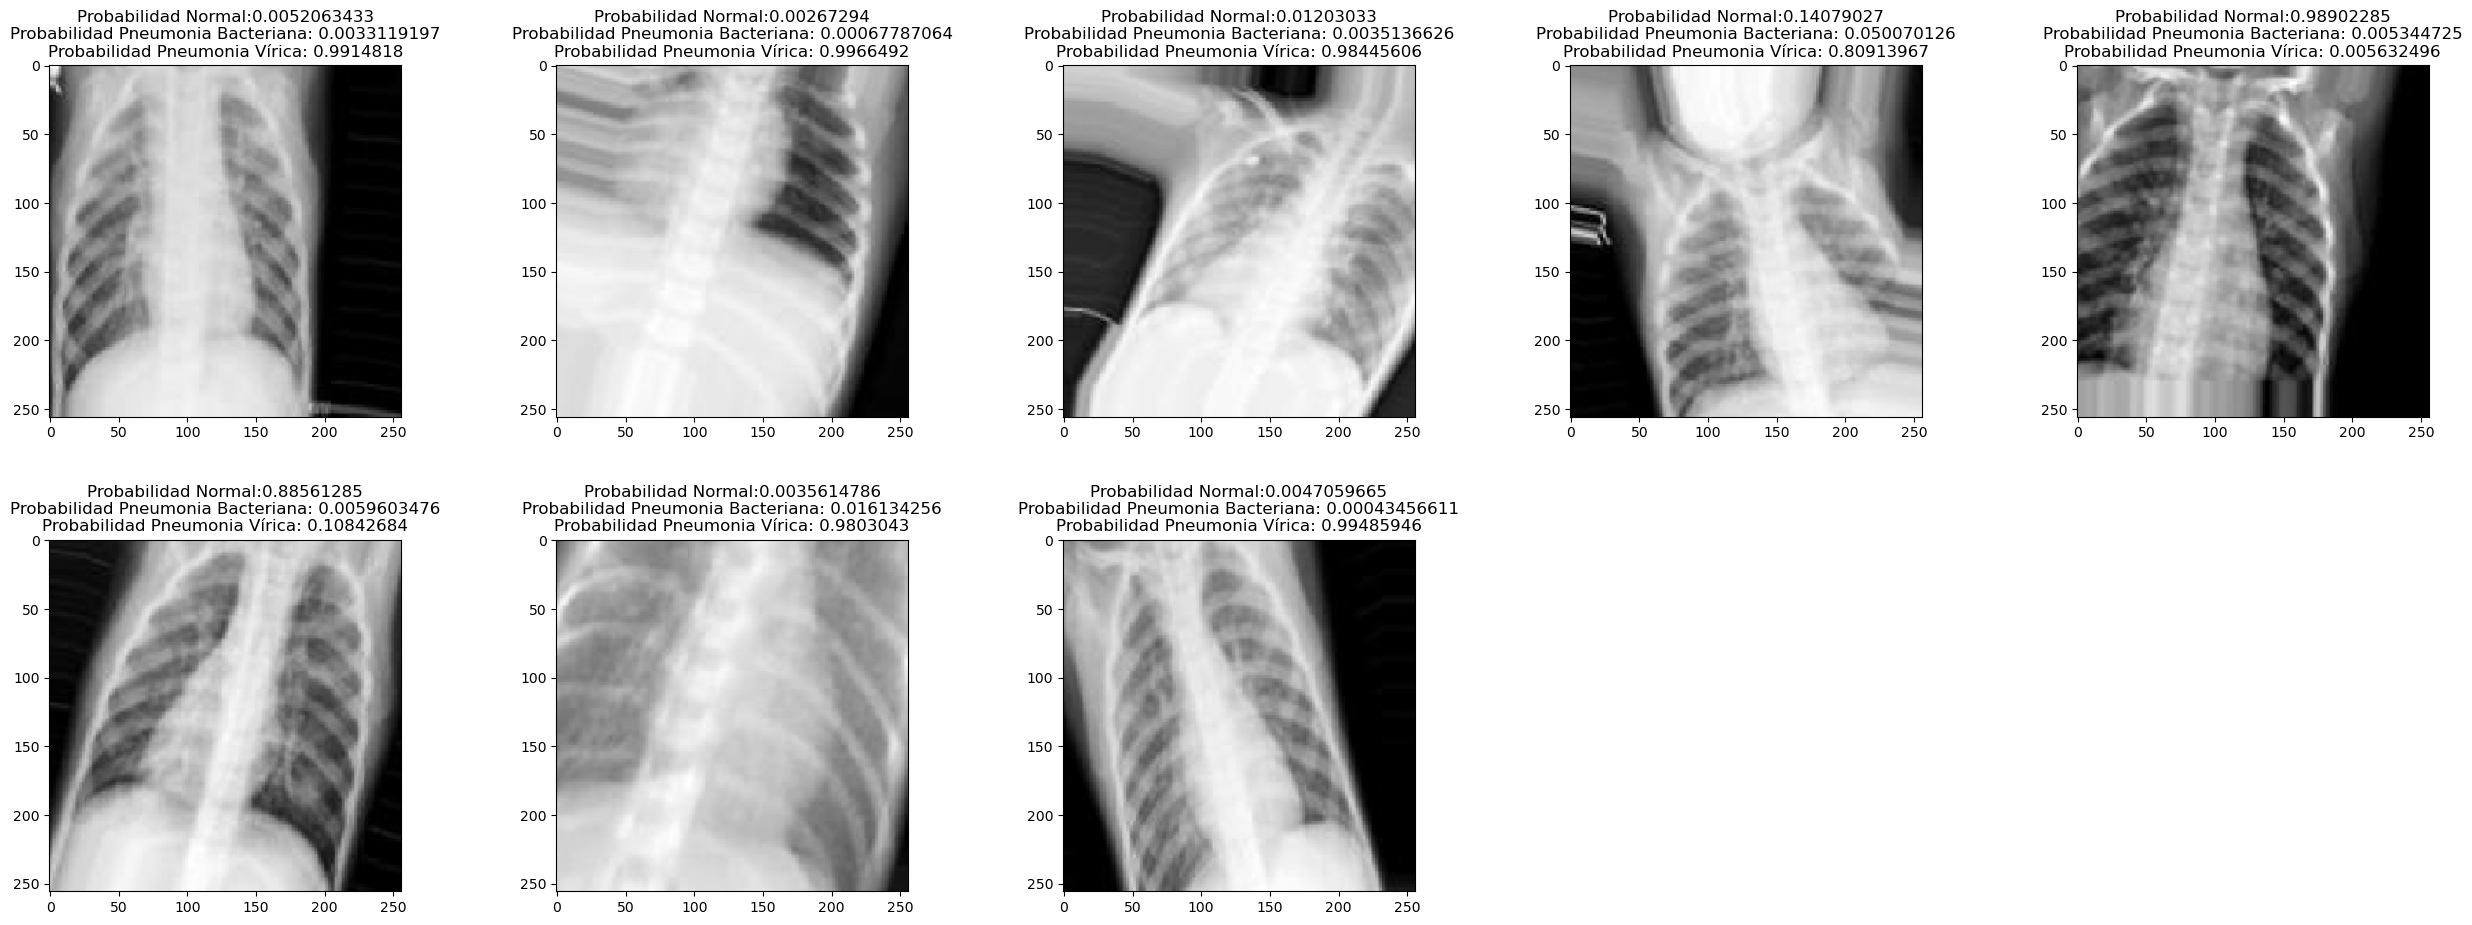

In [43]:
current_dir = os.getcwd()
i = 0
probs = []
plt.figure(figsize=(25, 25))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for file in os.listdir( current_dir + '/archive/chest_xray/chest_xray/val/PNEUMONIA_Virica/'):
    plt.subplot(5, 5, i + 1)
    i = i+1
    img = load_img(current_dir + '/archive/chest_xray/chest_xray/val/PNEUMONIA_Virica/' + file, target_size = (img_width, img_height), grayscale=True)  
    x = img_to_array(img)  
    img_batch = np.expand_dims(x, axis=0)
    prediction = model.predict(img_batch)
    plt.title(prediction)
    plt.title('Probabilidad Normal:' + str(prediction[0][0]) + '\nProbabilidad Pneumonia Bacteriana: ' + str(prediction[0][1]) + '\nProbabilidad Pneumonia Vírica: ' + str(prediction[0][2])) 
    plt.imshow(img, cmap='gray')